## Observations and Insights 

In [104]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
study_data_complete


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [105]:
# Checking the number of mice.
total_number_of_mice_raw_data = len(study_data_complete["Mouse ID"].unique())
total_number_of_mice_raw_data

249

In [106]:
# what are the unique time points?
unique_time_points = study_data_complete["Timepoint"].unique()
unique_time_points

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int64)

In [107]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse_ID_and_timepoint = study_data_complete.loc[study_data_complete.duplicated(["Mouse ID", "Timepoint"])]
duplicated_mouse_ID_and_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [108]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_complete_clean = study_data_complete.drop_duplicates(["Mouse ID", "Timepoint"])
study_data_complete_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [109]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.


In [110]:
# remove un-necessatry columns
summary_stats_mean = study_data_complete_clean[["Drug Regimen", "Tumor Volume (mm3)"]]

# group dataframe by Drug Regimen
summary_stats_mean_grouped = summary_stats_mean.groupby(["Drug Regimen"], as_index=False)

# step one, a mean total for each Drug Regimen
summary_stats_mean_grouped = summary_stats_mean_grouped.mean()

summary_stats_mean_grouped.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Mean (mm3)"}, inplace=True)

#summary_stats_mean_grouped.round(2)

In [111]:
# remove un-necessatry columns
summary_stats_median = study_data_complete_clean[["Drug Regimen", "Tumor Volume (mm3)"]]

# group dataframe by Drug Regimen
summary_stats_median_grouped = summary_stats_median.groupby(["Drug Regimen"], as_index=False)

# step one, a mean total for each Drug Regimen
summary_stats_median_grouped = summary_stats_median_grouped.median()

summary_stats_median_grouped.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Median (mm3)"}, inplace=True)

#summary_stats_median_grouped.round(2)

In [112]:
# remove un-necessatry columns
summary_stats_variance = study_data_complete_clean[["Drug Regimen", "Tumor Volume (mm3)"]]

# group dataframe by Drug Regimen
summary_stats_variance_grouped = summary_stats_variance.groupby(["Drug Regimen"], as_index=False)

# step one, a variance total for each Drug Regimen
summary_stats_variance_grouped = summary_stats_variance_grouped.var()

summary_stats_variance_grouped.rename(columns={"Tumor Volume (mm3)": "Tumor Volume variance (mm3)"}, inplace=True)

#summary_stats_variance_grouped.round(2)

In [113]:
# combine all the working dataframes
summary_statistics = pd.merge(summary_stats_mean_grouped, summary_stats_median_grouped, how="left", on=["Drug Regimen", "Drug Regimen"])
summary_statistics = pd.merge(summary_statistics, summary_stats_variance_grouped, how="left", on=["Drug Regimen", "Drug Regimen"])
#summary_statistics.round(2)

In [114]:
# standard deviation is square root of the variance column. so now i need to add a new column with that formula.
# create a column for "square root of the variance" in the summary_statistics dataframe

summary_statistics['Tumor Volume Standard Deviation (mm3)'] = np.sqrt(summary_statistics['Tumor Volume variance (mm3)'])
summary_statistics.round(2)

,Drug Regimen,Tumor Volume Mean (mm3),Tumor Volume Median (mm3),Tumor Volume variance (mm3),Tumor Volume Standard Deviation (mm3)
0,Capomulin,40.68,41.56,24.95,4.99
1,Ceftamin,52.59,51.78,39.29,6.27
2,Infubinol,52.88,51.82,43.13,6.57
3,Ketapril,55.24,53.70,68.55,8.28
4,Naftisol,54.33,52.51,66.17,8.13
5,Placebo,54.03,52.29,61.17,7.82
6,Propriva,52.39,50.91,43.14,6.57
7,Ramicane,40.22,40.67,23.49,4.85
8,Stelasyn,54.23,52.43,59.45,7.71
9,Zoniferol,53.24,51.82,48.53,6.97


In [118]:
summary_stats_sem = study_data_complete_clean

In [ ]:
# Standard Error Notes

# sample = study_data_complete_clean(["Drug Regimen"]).len()
#summary_stats_sem['Tumor Volume SEM (mm3)'] = summary_stats_sem(['Tumor Volume (mm3)'].sem())

# OKAY LETS GO BACK TO BASICS
# WE WANT TO FIND THE SEM OF THE TUMOR VOLUME FOR WHEN THE "Drug Regimen" IS .. 
# WHEN DRUG REGIMEN == "", CALCULATE THE SEM OF THE "Drug Regimen" 
# sample = study_data_complete_clean.("Drug Regimen")
# create a new table?


# # group dataframe by Drug Regimen
# summary_stats_sem_grouped = summary_stats_sem.groupby(["Drug Regimen"], as_index=False)
# summary_stats_sem_grouped.sem()

# summary_stats_sem_grouped = (sem(summary_stats_sem["Tumor Volume (mm3)"]))
# summary_stats_sem_grouped

# summary_stats_sem("Drug Regimen") = (sem(summary_stats_sem))

# l = [0,2,4,5,6,7]
# print(sem(l))

# # group dataframe by Drug Regimen
# summary_stats_sem_grouped = summary_stats_sem.groupby(["Drug Regimen"], as_index=False)
# # step one, a mean total for each Drug Regimen
# summary_stats_sem_grouped = summary_stats_sem_grouped.sem()
# summary_stats_sem_grouped.rename(columns={"Tumor Volume (mm3)": "Tumor Volume SEM (mm3)"}, inplace=True)
# summary_stats_sem_grouped.round(2)

# # Calculate standard error on means
# SEM is calculated by taking the standard deviation and dividing it by the square root of the sample size.
# does the sample size here mean the amount of tests for each drug, or does it mean the entire population of the results?
# i feel like it means the amount of tests for each drug

# sems = [sem(s.MEDV) for s in samples]

# # Calculate the range of SEM values
# print(f"The range of SEM values in the sample set is {max(sems)-min(sems)}")

# # Generate a new 30 vehicle sample and calculate the SEM of the sample
# sample = fuel_economy.sample(30)
# print(f"The SEM value for the sample fuel economy data is {sem(sample.Combined_LP100km)}")

# The sem() method calculates the standard error of the mean for each column

In [ ]:
# what are the unique Drug Regimens?
unique_drug_regimen = study_data_complete["Drug Regimen"].unique()
unique_drug_regimen

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

In [ ]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# cities = ["New Orleans", "Milwaukee", "Omaha", "Pittsburgh", "Toledo"]
# bars_in_cities = [8.6, 8.5, 8.3, 7.9, 7.2]
# x_axis = np.arange(len(bars_in_cities))



# # Create a bar chart based upon the above data
# plt.bar(x_axis, bars_in_cities, color="b", align="center")



# # Create a bar chart based upon the above data
# plt.bar(x_axis, bars_in_cities, color="b", align="center")

# # Create the ticks for our bar chart's x axis
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, cities)

# # Set the limits of the x axis
# plt.xlim(-0.75, len(x_axis)-0.25)

# # Set the limits of the y axis
# plt.ylim(0, max(bars_in_cities)+0.4)

# # Give the chart a title, x label, and y label
# plt.title("Density of Bars in Cities")
# plt.xlabel("Cities")
# plt.ylabel("Bars Per 10,000 Households")

# # Save an image of the chart and print it to the screen
# plt.savefig("../Images/BarDensity.png")
# plt.show()

In [ ]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.



In [121]:
study_data_complete_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [123]:
number_of_male_mice = len(study_data_complete_clean.loc[study_data_complete_clean["Sex"] == "Male"])
number_of_male_mice

958

In [124]:
number_of_female_mice = len(study_data_complete_clean.loc[study_data_complete_clean["Sex"] == "Female"])
number_of_female_mice

930

In [135]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [number_of_male_mice, number_of_female_mice]

# The colors of each section of the pie chart
colors = ["blue", "hotpink"]

([<matplotlib.patches.Wedge at 0x194c09765f8>,
 [Text(-0.6872462450269542, -0.8588903298421469, 'Male'),
  Text(0.6872463254420675, 0.8588902654975058, 'Female')],
 [Text(-0.37486158819652043, -0.46848563445935276, '50.7%'),
  Text(0.3748616320593095, 0.46848559936227585, '49.3%')])

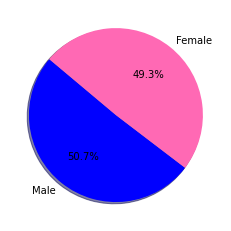

In [136]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# https://matplotlib.org/stable/gallery/pyplots/boxplot_demo_pyplot.html


In [ ]:
# # Example outlier plot of reaction times
# times = [96,98,100,105,85,88,95,100,101,102,97,98,5]
# fig1, ax1 = plt.subplots()
# ax1.set_title('Reaction Times at Baseball Batting Cage')
# ax1.set_ylabel('Reaction Time (ms)')
# ax1.boxplot(times);



# # We need to sort the data to determine which could be outliers
# times.sort()
# print(times)



# # The second example again looks at the LAX temperature data set and computes quantiles
# temperature_df = pd.read_csv('../Resources/lax_temperature.csv')
# temperatures = temperature_df['HourlyDryBulbTemperature']

# fig1, ax1 = plt.subplots()
# ax1.set_title('Temperatures at LAX')
# ax1.set_ylabel('Temperature (°C)')
# ax1.boxplot(temperatures);



# # If the data is in a dataframe, we use pandas to give quartile calculations
# quartiles = temperatures.quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

# print(f"The lower quartile of temperatures is: {lowerq}")
# print(f"The upper quartile of temperatures is: {upperq}")
# print(f"The interquartile range of temperatures is: {iqr}")
# print(f"The the median of temperatures is: {quartiles[0.5]} ")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# # Collect the user's input to search through our data frame
# wrestler_name = input("What wrestler's career would you like to look at?")



# # Create a series that looks for a wrestler by name and then traces their wins from 2013 to 2016
# wins_over_time = wrestled_over_hundred.loc[wrestler_name,["2013 Wins","2014 Wins", "2015 Wins", "2016 Wins"]]

# # Create a series that looks for a wrestler by name and then traces their losses from 2013 to 2016
# losses_over_time = wrestled_over_hundred.loc[wrestler_name,["2013 Losses","2014 Losses",
#                                                             "2015 Losses", "2016 Losses"]]



# # Create a list of the years that we will use as our x axis
# years = [2013,2014,2015,2016]

# # Plot our line that will be used to track a wrestler's wins over the years
# plt.plot(years, wins_over_time, color="green", label="Wins")

# # Plot our line that will be used to track a wrestler's losses over the years
# plt.plot(years, losses_over_time, color="blue", label="Losses")

# # Place a legend on the chart in what matplotlib believes to be the "best" location
# plt.legend(loc="best")

# plt.title(wrestler_name + "'s Recent Career")
# plt.xlabel("Years")
# plt.xticks(np.arange(min(years), max(years)+1, 1.0))
# plt.ylabel("Number of Wins/Losses");                                                            

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


In [ ]:
# # Set the 'car name' as our index
# car_data = car_data.set_index('car name')

# # Remove the 'origin' column
# del car_data['origin']

# car_data.head()


# # Convert the "horsepower" column to numeric so the data can be used
# car_data['horsepower'] = pd.to_numeric(car_data['horsepower'])


# # Create a scatter plot which compares MPG to horsepower
# car_data.plot(kind="scatter", x="horsepower", y="mpg", grid=True, figsize=(8,8),
#               title="MPG Vs. Horsepower");

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [ ]:
# # Plot malic_acid versus flavanoids on a scatterplot
# malic_acid = wine_data.malic_acid
# flavanoids = wine_data.flavanoids
# plt.scatter(malic_acid,flavanoids)
# plt.xlabel("Amount of Malic Acid")
# plt.ylabel("Amount of Flavanoids");


# # Calculate the correlation coefficient between malic_acid and flavanoids
# print(f"The correlation coefficient between malic acid and flavanoids is {round(st.pearsonr(malic_acid,flavanoids)[0],2)}")


# # Plot alcohol versus colour_intensity on a scatterplot
# alcohol = wine_data.alcohol
# color_intensity = wine_data.color_intensity
# plt.scatter(alcohol,color_intensity)
# plt.xlabel("Amount of Alcohol")
# plt.ylabel("Intensity of Color");


# # Calculate the correlation coefficient between alcohol and color_intensity
# print(f"The correlation coefficient between alcohol and color intensity is {round(st.pearsonr(alcohol,color_intensity)[0],2)}")


# # BONUS: Generate the correlation matrix and find the strongest positive and negative correlations
# wine_corr = wine_data.corr()
# wine_corr.unstack().sort_values()

In [ ]:
# # Generate a scatter plot of year versus violent crime rate
# year = crime_data.iloc[:,0]
# violent_crime_rate = crime_data.iloc[:,3]
# plt.scatter(year,violent_crime_rate)
# plt.xticks(year, rotation=90)
# plt.xlabel('Year')
# plt.ylabel('Violent Crime Rate');


# # Perform a linear regression on year versus violent crime rate
# vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, violent_crime_rate)


# # Create equation of line to calculate predicted violent crime rate
# vc_fit = vc_slope * year + vc_int


# # Plot the linear model on top of scatter plot 
# year = crime_data.iloc[:,0]
# violent_crime_rate = crime_data.iloc[:,3]
# plt.scatter(year,violent_crime_rate)
# plt.plot(year,vc_fit,"--")
# plt.xticks(year, rotation=90)
# plt.xlabel('Year')
# plt.ylabel('Violent Crime Rate');


# # Generate a facet plot of all 3 figures
# fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
# fig.suptitle("Crime Rates Over Time", fontsize=16, fontweight="bold")

# ax1.set_xlim(min(year), max(year))
# ax1.plot(year, violent_crime_rate, linewidth=1, marker="o")
# ax1.plot(year, vc_fit, "b--", linewidth=1)
# ax1.set_ylabel("Violent Crime Rate")

# ax2.plot(year, murder_rate, linewidth=1, marker="o", color="r")
# ax2.plot(year, m_fit, "r--", linewidth=1)
# ax2.set_ylabel("Murder Rate")

# ax3.plot(year, aggravated_assault_rate, linewidth=1, marker="o", color="g")
# ax3.plot(year, aa_fit, "g--", linewidth=1)
# ax3.set_ylabel("Aggravated Assault Rate")
# ax3.set_xlabel("Year");